# Kaggle: Analysis on ML and Data Science survey of 2019 and India Presence

# Import Libraries


In [94]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from mord import LogisticAT

# Import Kaggle 2019 data

In [95]:
#impot the Kaggle's data and keep the question column only
df = pd.read_csv("multiple_choice_responses.csv", skiprows=[1])

In [96]:
#The below Variables will be used in further Anlysis in the Code

# Get column names.
df_columns = df.columns.tolist()
# Get the shape
df_shape=df.shape

# Kagglers Who are they?

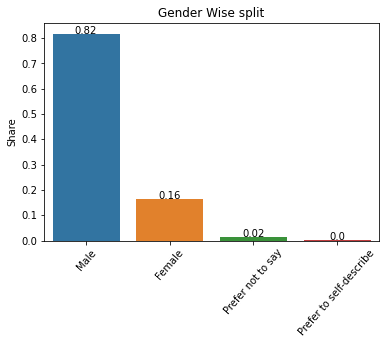

                    Gender     Share
0                     Male  0.818482
1                   Female  0.162905
2        Prefer not to say  0.016128
3  Prefer to self-describe  0.002485


In [97]:
# Analysis of gender.

Gen_barplot = df["Q2"].value_counts()/df_shape[0]
Gen_barplot = pd.DataFrame({'Gender':Gen_barplot.index,
                                    'Share':Gen_barplot.values})

fig = sns.barplot(y = "Share", x = "Gender", data=Gen_barplot)
for index, row in Gen_barplot.iterrows():
    fig.text(row.name,row.Share, round(row.Share,2), color='black', ha="center")
       
fig.set_xlabel('')
fig.set_title('Gender Wise split')
plt.xticks(rotation=49);

fig = fig.get_figure() 
plt.show()
print (Gen_barplot)


In the Survey, about 81.9% are male and 16.3% are female as a respondents.
This reflects a very acute problem in the world of Data Science, and of the technology in general.
The gender ratio is heavily skewed towards men. 

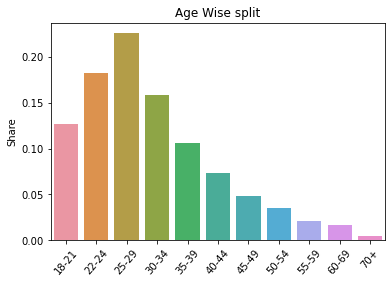

      Age     Share
0   25-29  0.226099
1   22-24  0.183091
2   30-34  0.158239
3   18-21  0.126896
4   35-39  0.105848
5   40-44  0.072983
6   45-49  0.048131
7   50-54  0.035097
8   55-59  0.021403
9   60-69  0.017143
10    70+  0.005072


In [98]:
# Analysis of Age.

Age_barplot = df["Q1"].value_counts()/df_shape[0]
Age_barplot = pd.DataFrame({'Age':Age_barplot.index,
                                    'Share':Age_barplot.values})
Age_barplot_srt=Age_barplot.sort_values(by='Age', ascending=True)

fig = sns.barplot(y = "Share", x = "Age", data=Age_barplot_srt)
   
fig.set_xlabel('')
fig.set_title('Age Wise split')
plt.xticks(rotation=49);

fig = fig.get_figure() 
plt.show()
print (Age_barplot)




The majority of our respondents are in between the age group of  22 and 34 years old, with the peak group in the 25-29 age bracket.

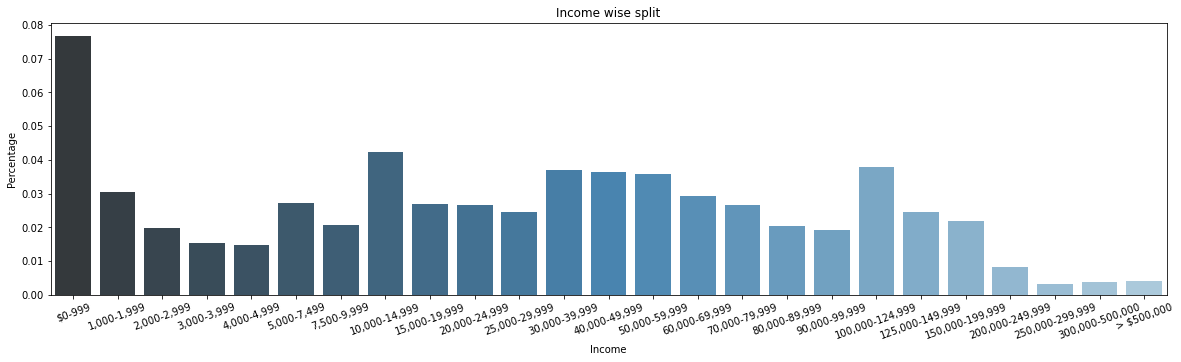

In [99]:
df_income_barplot= df["Q10"].value_counts()/df_shape[0]
df_income_barplot = pd.DataFrame({'Income':df_income_barplot.index,
                                 'Share':df_income_barplot.values}).sort_values(['Income'])

df_label_income = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
        '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999','30,000-39,999',
        '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
        '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
        '250,000-299,999', '300,000-500,000', '> $500,000'] 

df_income_barplot["Income"] = pd.Categorical(df_income_barplot["Income"], categories=df_label_income, ordered=True)

df_income_barplot

plt.figure(figsize=(20,5))
fig = sns.barplot(y = "Share", x = "Income", data=df_income_barplot, palette="Blues_d")
fig.set_xlabel('')
fig.set_title('Inchttp://localhost:8888/notebooks/Kaggle%20Survey%202019.ipynb#ome wise split')
plt.xlabel("Income")
plt.ylabel("Percentage")
plt.xticks(rotation=20);
fig = fig.get_figure() 
fig.savefig("income.png", bbox_inches='tight')

Majority of the respondents have salary range between $0-999

# Is there any presence of India?

In [100]:
#Filter the data based on India
df_india = df.loc[(df.Q3=="India"),:]

In [101]:
#get the shape
df_india_shape=df_india.shape
#Overview of the India Data
df_india.head()


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
6,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
10,290,18-21,Male,-1,India,Some college/university study without earning ...,Student,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
14,524,25-29,Male,-1,India,Bachelor’s degree,Other,3,"1000-9,999 employees",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


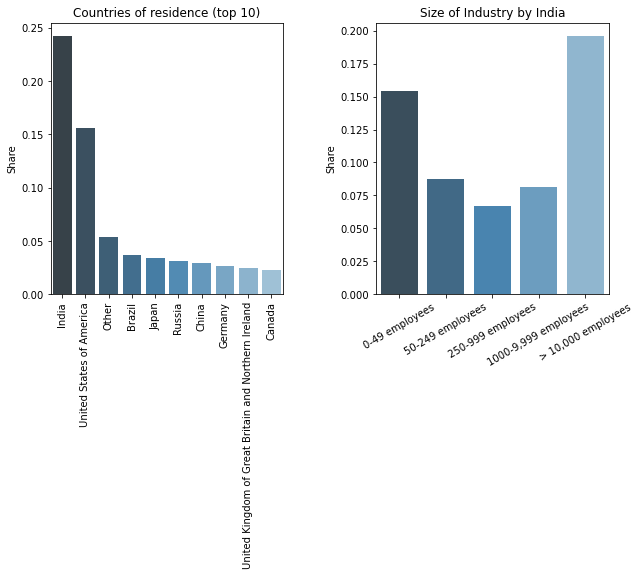

In [102]:
# Analysis of Country
# Prepare the data.
df_country_barplot = df["Q3"].value_counts()/df_shape[0]
df_country_barplot = pd.DataFrame({'Country':df_country_barplot.index,
                                 'Share':df_country_barplot.values}).head(10)

# Analysis of company size.
# Prepare the data.
df_india_size= df_india["Q6"].value_counts()/df_india_shape[0]
df_india_size = pd.DataFrame({'Size':df_india_size.index,
                                  'Share':df_india_size.values}).sort_values(['Size'])

order_company = ["0-49 employees", "50-249 employees", "250-999 employees",
                "1000-9,999 employees", "> 10,000 employees"] 

df_india_size["Size"] = pd.Categorical(df_india_size["Size"], 
                                           categories=order_company, ordered=True)

# Plot the two figures together.
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 5)

ax[0] = sns.barplot(y = "Share", x = "Country", data=df_country_barplot, palette="Blues_d", ax=ax[0]) 
ax[0].set(xlabel="", ylabel="Share")
ax[0].set_title('Countries of residence (top 10)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

ax[1] = sns.barplot(y = "Share", x = "Size", data=df_india_size, palette="Blues_d", ax=ax[1])
ax[1].set(xlabel="", ylabel="Share")
ax[1].set_title('Size of Industry by India')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)

# Adjust the space between the graphs and export the figure.
fig.subplots_adjust(wspace=0.4)
fig.savefig("country_size.png", bbox_inches='tight')

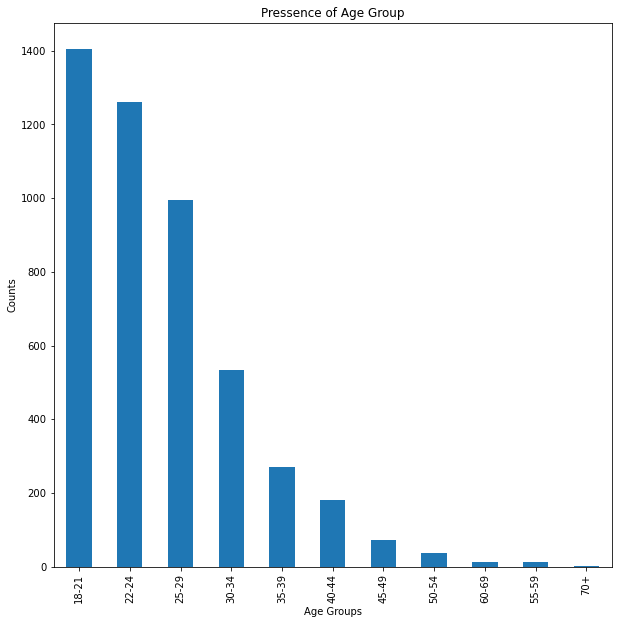

In [103]:
#Age Analysis for India
plt.figure(figsize=(10,10))
df_india.Q1.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Age Groups")
plt.title("Pressence of Age Group")
plt.show()

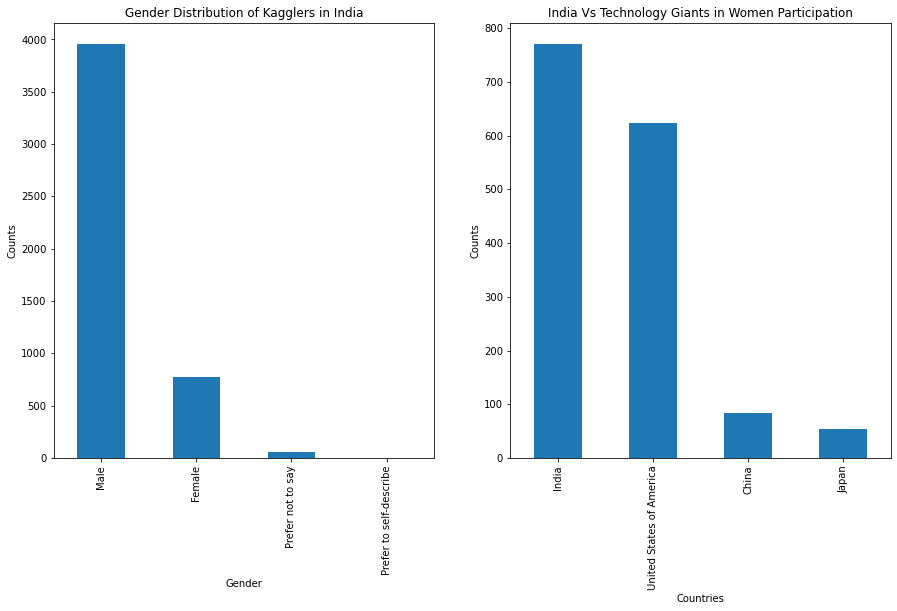

In [104]:
#Anlsys on Gender Distribution vs Tehncology giants 

#prepare the data for Gender distirubtion of india

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df_india.Q2.value_counts().plot(kind="bar")
plt.ylabel('Counts')
plt.xlabel("Gender")
plt.title("Gender Distribution of Kagglers in India")

# prepare the data for Gender distribtuion across Technology Giants
df_giant = df.loc[(df.Q2=="Female") & ((df.Q3=="India") | (df.Q3=="United States of America") | (df.Q3=="China") | (df.Q3=="Japan")), :]
plt.subplot(1,2,2)
df_giant.Q3.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Countries")
plt.title("India Vs Technology Giants in Women Participation")

plt.show()

# How to break into this field?

In [105]:
#Prepare the data for Most Preferred online platform
df_IDE = pd.DataFrame(columns=['IDE','count','percentage'])

for i in range(1,12):
    df_IDE = df_IDE.append({'IDE':df['Q13_Part_{}'.format(i)].mode()[0],'count':df['Q13_Part_{}'.format(i)].count(),'percentage':df['Q13_Part_{}'.format(i)].count()/len(df)},ignore_index=True)
df_IDE.index = df_IDE['IDE']
df_IDE = df_IDE.drop(columns='IDE')
df_IDE['percentage'] = df_IDE['percentage']*100
df_IDE_sort = df_IDE[['percentage']].sort_values(by='percentage', ascending=False)
df_IDE_sort_rst = df_IDE_sort.reset_index()

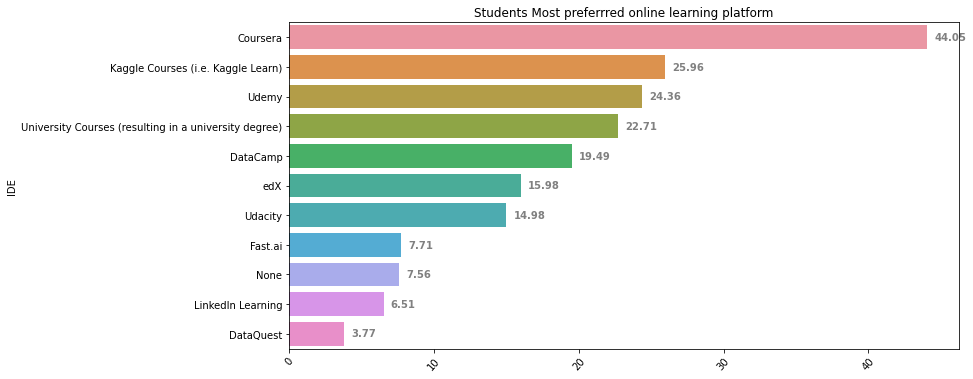

In [106]:
# Prepare the graph for preferred online platform
fig=plt.subplots(figsize=(12,6))
fig = sns.barplot(y = "IDE", x = "percentage", data=df_IDE_sort_rst)
for i in fig.patches:
    fig.text(i.get_width()+0.5, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
fig.set_xlabel('Percentage')      
fig.set_xlabel('')
fig.set_title('Students Most preferrred online learning platform')
plt.xticks(rotation=49);

fig = fig.get_figure() 

plt.show()



#What is the preferred language for Data Science

In [107]:
#analhysis and prepare the data for Preferred programming language
df_prog_lang = pd.DataFrame(columns=['Language', 'count'])

for i in range(1,13):
    df_prog_lang = df_prog_lang.append({'Language':df['Q18_Part_{}'.format(i)].mode()[0], 'count':df['Q18_Part_{}'.format(i)].count()}, ignore_index=True)

df_prog_lang.index = df_prog_lang['Language']
df_prog_lang = df_prog_lang.drop(columns=['Language'])
df_prog_lang_sort = df_prog_lang.sort_values(by='count', ascending=False)
df_prog_lang_rst = df_prog_lang_sort.reset_index()

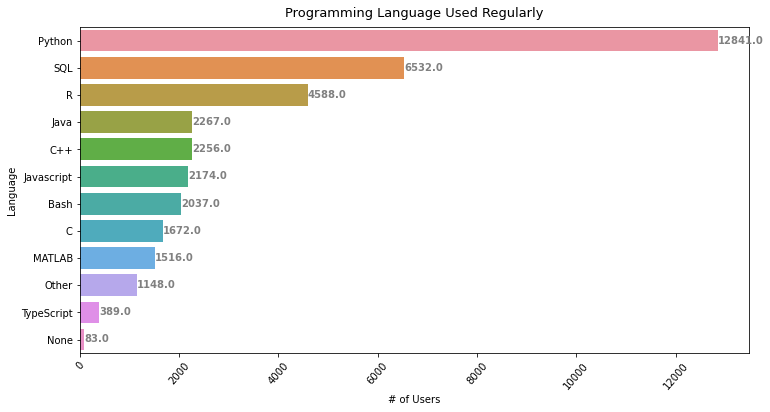

In [108]:
# Prepare the graph for preferred Programming Language
fig=plt.subplots(figsize=(12,6))
fig = sns.barplot(y = "Language", x = "count", data=df_prog_lang_rst)
for i in fig.patches:
    fig.text(i.get_width()+0.5, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
fig.set_title("Programming Language Used Regularly", loc='center', pad=10, fontsize=13)
fig.set_xlabel('# of Users')

plt.xticks(rotation=49);

fig = fig.get_figure() 

plt.show()



Python clearly dominates. It is also the language mostly recommended to newbies in Data Science


# Can we predict Salary using Ordinal Regression?

### Data Preprocessing & Cleaning

##### Dealing with Text

In [109]:
# Here we are adjusting the contents of columns containing "Text" in their names.
# If the survey entry contained a text response - the column will contain 1.
# If the survey entry left the text field blank - the column will contain 0.
# At the moment, each positive integer in a column relates to one specific text response
# and grouping all of them together helps us create new features that are meaningful for the model below

for col in df_columns:
    if "TEXT" in str.split(col, "_"):
        df.loc[df[col] == -1, col] = 0
        df.loc[df[col] != -1, col] = 1

##### Missing values - multiple choice questions

In [110]:
# If we have a NaN in a field linked to a multiple choice question,
# we are assuming that not choosing a given response was intentional.
# In other words, not ticking a box in a survey should not correspond to a missing
# value as such. To fix that problem, we will replace all NaNs with 0s for
# those columns.

# Columns with "TEXT" and "Part" in their name do not have missing values,
# we do not need to worry about them.
for col in df_columns:
    if "Part" in str.split(col, "_"):
        df.loc[df[col].isna(), col] = 0

##### Missing values - Single choice questions

In [111]:
# Having done the operations above, drop all rows that still contain missing values.
# Those blank entries will be linked to single choice questions that were skipped in the process
# of filling the survey.

df = df.dropna()

new_df_shape = df.shape
print(new_df_shape)


(10541, 246)


In [112]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,1,France,Master’s degree,Software Engineer,1,"1000-9,999 employees",0,...,0,0,0,0,0,0,0,0,0,1
3,391,40-44,Male,1,Australia,Master’s degree,Other,1,"> 10,000 employees",20+,...,0,0,0,0,0,Azure SQL Database,0,0,0,1
4,392,22-24,Male,1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,0,0,0,0,0,0,0,0,0,1
5,470,50-54,Male,1,France,Master’s degree,Data Scientist,1,0-49 employees,3-4,...,0,0,0,AWS Relational Database Service,0,0,0,0,0,1
6,529,22-24,Male,1,India,Master’s degree,Data Scientist,1,50-249 employees,20+,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,820,22-24,Female,1,Other,Bachelor’s degree,Other,1,50-249 employees,1-2,...,0,0,0,0,0,0,0,0,0,1
19603,306,22-24,Male,1,Sweden,Master’s degree,Statistician,1,"1000-9,999 employees",5-9,...,0,0,0,0,0,0,0,0,0,1
19663,762,25-29,Male,1,China,I prefer not to answer,Data Engineer,1,250-999 employees,5-9,...,0,0,0,0,0,0,0,0,0,1
19690,364,25-29,Male,1,Australia,Bachelor’s degree,Other,1,"1000-9,999 employees",5-9,...,0,0,0,0,0,0,0,0,0,1


##### Categorical Variable Treatment

In [113]:
# Get dummy variables based on categorical variables (one-hot encoding all categorical variables).
# Treat ordinal variables as numerical features.

num_cols = ['Time from Start to Finish (seconds)']
ord_cols = ['Q1', 'Q6', 'Q7', 'Q10', 'Q11', 'Q22', 'Q23']


exclude_col = num_cols + ord_cols

df = pd.get_dummies(df, columns =list(set(df_columns) - set(exclude_col)))

In [114]:
df

,Time from Start to Finish (seconds),Q1,Q6,Q7,Q10,Q11,Q22,Q23,Q25_Part_3_0,"Q25_Part_3_Automated model selection (e.g. auto-sklearn, xcessiv)",...,Q18_Part_12_0,Q18_Part_12_Other,Q24_Part_8_0,Q24_Part_8_Generative Adversarial Networks,Q34_Part_10_0,Q34_Part_10_Google Cloud SQL,Q32_Part_6_0,Q32_Part_6_Google Cloud Speech-to-Text,Q13_Part_8_0,Q13_Part_8_Udemy
0,510,22-24,"1000-9,999 employees",0,"30,000-39,999",$0 (USD),Never,1-2 years,1,0,...,1,0,1,0,1,0,1,0,0,1
3,391,40-44,"> 10,000 employees",20+,"250,000-299,999","$10,000-$99,999",Once,2-3 years,1,0,...,1,0,1,0,1,0,1,0,1,0
4,392,22-24,0-49 employees,0,"4,000-4,999",$0 (USD),Never,< 1 years,1,0,...,1,0,1,0,1,0,1,0,1,0
5,470,50-54,0-49 employees,3-4,"60,000-69,999","$10,000-$99,999",Never,10-15 years,0,1,...,1,0,0,1,1,0,1,0,1,0
6,529,22-24,50-249 employees,20+,"10,000-14,999",$100-$999,6-24 times,2-3 years,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,820,22-24,50-249 employees,1-2,"5,000-7,499",$100-$999,Never,1-2 years,1,0,...,1,0,1,0,1,0,1,0,1,0
19603,306,22-24,"1000-9,999 employees",5-9,"30,000-39,999",$0 (USD),Never,1-2 years,1,0,...,1,0,1,0,1,0,1,0,1,0
19663,762,25-29,250-999 employees,5-9,"20,000-24,999",$100-$999,Once,1-2 years,1,0,...,1,0,1,0,1,0,1,0,1,0
19690,364,25-29,"1000-9,999 employees",5-9,"60,000-69,999","$10,000-$99,999",Never,1-2 years,1,0,...,1,0,1,0,1,0,1,0,0,1


##### Transform ordinal entries into numbers

In [115]:
#Ordinal columns to be convert as Ordinal dummies

def ordinal_to_cat(col, order):
    '''
    INPUT:
    col - a column name 
    order - an ordered list of strings that are unique entries in the column
    
    OUTPUT:
    new_col - a new column where all strings are replaced with numerical entries
              and those values express the underlying order of the prior categorical
              entries
    '''
    new_col = pd.Categorical(df[col], categories=order, ordered=True)
    new_col = list(pd.factorize(df[col], sort=True)[0])
    
    return new_col

#Question 1 to be changed

col = "Q1"
uniq_vals = df[col].unique()
order = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'] 
df[col] = ordinal_to_cat(col, order)

#Question 6 to be changed
col = "Q6"
uniq_vals = df[col].unique()
order = ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "> 10,000 employees"] 
df[col] = ordinal_to_cat(col, order)

#Question 7 to be changed

col = "Q7"
uniq_vals = df[col].unique()
order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'] 
df[col] = ordinal_to_cat(col, order)

#Question 10 to be changed

col = "Q10"
uniq_vals = df[col].unique()
order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
        '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999','30,000-39,999',
        '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
        '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
        '250,000-299,999', '300,000-500,000', '> $500,000'] 
df[col] = ordinal_to_cat(col, order)

#Question 11 to be changed

col = "Q11"
uniq_vals = df[col].unique()
order = ['$0 (USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '> $100,000 ($USD)'] 
df[col] = ordinal_to_cat(col, order)

#Question 22 to be changed

col = "Q22"
uniq_vals = df[col].unique()
order = ['Never', 'Once', '2-5 times', '6-24 times', '> 25 times'] 
df[col] = ordinal_to_cat(col, order)

#Question 23 to be changed

col = "Q23"
uniq_vals = df[col].unique()
order = ['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-15 years', '20+ years'] 
df[col] = ordinal_to_cat(col, order)


In [116]:
df

,Time from Start to Finish (seconds),Q1,Q6,Q7,Q10,Q11,Q22,Q23,Q25_Part_3_0,"Q25_Part_3_Automated model selection (e.g. auto-sklearn, xcessiv)",...,Q18_Part_12_0,Q18_Part_12_Other,Q24_Part_8_0,Q24_Part_8_Generative Adversarial Networks,Q34_Part_10_0,Q34_Part_10_Google Cloud SQL,Q32_Part_6_0,Q32_Part_6_Google Cloud Speech-to-Text,Q13_Part_8_0,Q13_Part_8_Udemy
0,510,1,1,0,13,0,3,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3,391,5,4,4,11,2,4,2,1,0,...,1,0,1,0,1,0,1,0,1,0
4,392,1,0,0,15,0,3,7,1,0,...,1,0,1,0,1,0,1,0,1,0
5,470,7,0,5,19,2,3,1,0,1,...,1,0,0,1,1,0,1,0,1,0
6,529,1,3,4,2,3,1,2,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,820,1,3,1,17,3,3,0,1,0,...,1,0,1,0,1,0,1,0,1,0
19603,306,1,1,6,13,0,3,0,1,0,...,1,0,1,0,1,0,1,0,1,0
19663,762,2,2,6,8,3,4,0,1,0,...,1,0,1,0,1,0,1,0,1,0
19690,364,2,1,6,19,2,3,0,1,0,...,1,0,1,0,1,0,1,0,0,1


##### Correlation Analysis

In [117]:
# Check correlations with Salary.
df_sal_corr = pd.DataFrame(df.corr('spearman')["Q10"])
df_sal_corr["Abs value"] = df_sal_corr["Q10"].abs()
df_sal_corr.sort_values(["Abs value"], inplace=True, ascending=False)
df_sal_corr.head(10)

,Q10,Abs value
Q10,1.000000,1.000000
Q1,0.132487,0.132487
Q15_< 1 years,-0.131713,0.131713
Q3_Germany,0.121391,0.121391
Q3_India,-0.112371,0.112371
Q6,0.110451,0.110451
Q3_Canada,0.091067,0.091067
Q25_Part_3_0,0.090084,0.090084
"Q25_Part_3_Automated model selection (e.g. auto-sklearn, xcessiv)",-0.090084,0.090084
Q3_Japan,0.085969,0.085969


## Apply the model

In [118]:
# Split the data.
X = df.drop(columns = ["Q10"])
Y = df["Q10"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

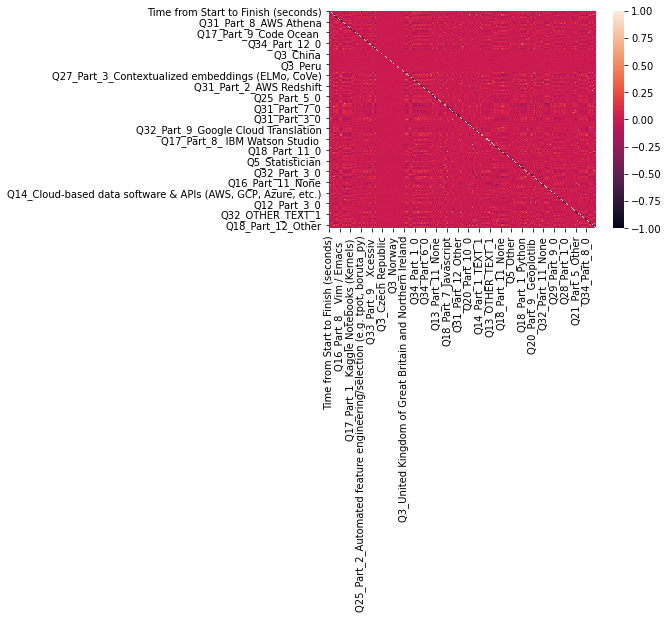

In [119]:
#Correlation Treatment

#seems like many variables are correlated to each other
sns.heatmap(X.corr())
#Dropping clumn which are highly correlated to each other postively and negatively
df_corr_mat = X.corr('spearman').abs()
upper = df_corr_mat.where(np.triu(np.ones(df_corr_mat.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
len(to_drop)

# Drop the columns.
X_train = X_train.drop(columns = to_drop)
y_train = y_train.drop(columns = to_drop)
X_test = X_test.drop(columns = to_drop)
y_test = y_test.drop(columns = to_drop)



In [120]:
#Model fitting

model = LogisticAT(alpha=0)
model.fit(X_train, y_train)

LogisticAT(alpha=0, max_iter=1000, verbose=0)

In [121]:
    # Assess the predictive power.

    # Define the accuracy score that will be used to evaluate the model.
    def accuracy_custom(target_true, target_fit):
        '''
        INPUT:
        target_true - a vector of actual labels 
        target_fit - a vector of predictions

        OUTPUT:
        score - estimated accuracy score
        '''
        target_fit = np.round(target_fit)
        target_fit.astype('int')
        score = accuracy_score(target_true, target_fit)

        return score

    # Establish the score on the testing set using cross-validation.
    acc_scores = make_scorer(accuracy_custom)
    acc_output = cross_val_score(model,
        X_test,
        y_test,
        cv=3,
        scoring=acc_scores)
    print('Ordered logistic regression: ', np.mean(acc_output))

Ordered logistic regression:  0.05879563774300617


In [122]:
# Establish the mean absolute error on the testing set as above.
MAE = make_scorer(mean_absolute_error)
mae_ordinal = cross_val_score(model,
    X_test,
    y_test,
    cv=3,
    scoring=MAE)

print('Ordered logistic regression: ', np.mean(mae_ordinal))

Ordered logistic regression:  7.576576576576577
